Best Route: [0, 3, 4, 1, 2, 0]
Minimum Distance: 20.45


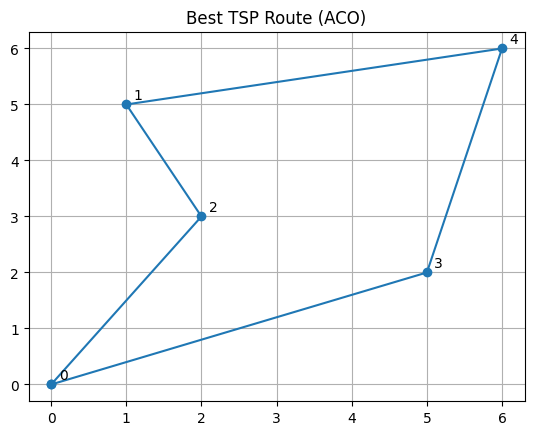

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random

# --- Parameters ---
NUM_ANTS = 50
NUM_ITERATIONS = 100
ALPHA = 1.0  # Pheromone importance
BETA = 2.0  # Distance priority
EVAPORATION_RATE = 0.5  # Pheromone evaporation rate
Q = 100  # Pheromone deposit factor

# --- City Coordinates ---
cities = [(0, 0), (1, 5), (2, 3), (5, 2), (6, 6)]
N_CITIES = len(cities)
dist_matrix = np.zeros((N_CITIES, N_CITIES))

# --- Distance Calculation ---
def euclidean_distance(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))

for i in range(N_CITIES):
    for j in range(N_CITIES):
        if i != j:
            dist_matrix[i][j] = euclidean_distance(cities[i], cities[j])

# --- Initialize Pheromones ---
pheromone = np.ones((N_CITIES, N_CITIES))

# --- Ant Colony Optimization ---
def aco():
    global pheromone  # Access the global pheromone matrix
    best_distance = float('inf')
    best_route = []
    for _ in range(NUM_ITERATIONS):
        all_routes = []
        all_distances = []
        for _ in range(NUM_ANTS):
            route = [random.randint(0, N_CITIES - 1)]
            while len(route) < N_CITIES:
                current_city = route[-1]
                probabilities = []
                for next_city in range(N_CITIES):
                    if next_city not in route:
                        distance = dist_matrix[current_city][next_city]
                        if distance == 0:
                            continue  # Avoid division by zero
                        prob = (pheromone[current_city][next_city] ** ALPHA) * \
                               ((1 / distance) ** BETA)
                        probabilities.append((next_city, prob))
                total = sum(p for _, p in probabilities)
                if total == 0:
                    break  # Avoid selecting from an empty list
                chosen_city = random.choices([c for c, _ in probabilities], [p / total for _, p in probabilities])[0]
                route.append(chosen_city)
            route.append(route[0])  # Return to start
            distance = sum(dist_matrix[route[i]][route[i+1]] for i in range(len(route)-1))
            all_routes.append(route)
            all_distances.append(distance)
            if distance < best_distance:
                best_distance = distance
                best_route = route
        # Update pheromones
        pheromone *= (1 - EVAPORATION_RATE)
        for route, distance in zip(all_routes, all_distances):
            for i in range(len(route) - 1):
                pheromone[route[i]][route[i+1]] += Q / distance
                pheromone[route[i+1]][route[i]] += Q / distance
    return best_route, best_distance

# --- Run ACO and Plot Results ---
best_route, best_distance = aco()
print(f"Best Route: {best_route}")
print(f"Minimum Distance: {best_distance:.2f}")

# Plot the best route
x_coords = [cities[i][0] for i in best_route]
y_coords = [cities[i][1] for i in best_route]
plt.plot(x_coords, y_coords, marker='o')
for i, city in enumerate(cities):
    plt.text(city[0] + 0.1, city[1] + 0.1, str(i))
plt.title("Best TSP Route (ACO)")
plt.grid(True)
plt.show()